In [3]:
import pandas as pd

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

%pylab inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns
%matplotlib inline


from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

Populating the interactive namespace from numpy and matplotlib


In [4]:
d=pd.read_csv("RedditShortDemoSurvey-1-Cleaned.csv")

In [5]:
d.columns 

Index([u'Entry Id', u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?',
       u'What best describes your employment status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Treated country data',
       u'(For U. S. redditors) In which state do you live?',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'treated subreddit data', u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?', u'Unnamed: 14',
       u'Unnamed: 15', u'Unnamed: 16', u'Unnamed: 17', u'Unnamed: 18',
       u'Unnamed: 19'],
      dtype='object')

In [6]:
import numpy as np

In [7]:
d.shape

(32754, 20)

EDA for the Data set

In [8]:
del d['Unnamed: 14']

In [9]:
d

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,NaN,NaN,NaN,NaN,NaN
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN


In [10]:
del d['Unnamed: 15']
del d['Unnamed: 16']
del d['Unnamed: 17']
del d['Unnamed: 18']
del d['Unnamed: 19']


In [11]:
d.head(5)

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?"
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none


In [12]:
d = d.rename(columns = {
        'Entry Id':'Entry Id',
        'Please indicate your gender.':'Gender'})

In [13]:
d = d.rename(columns = {
        'Please select the category that includes your age.':'Age_Group',
        'What is your marital status?':'Marital_Status',
        'What best describes your employment status?':'Employment_Status',
        'Are you or have you ever been in military service?':'Military_Service',
        'Do you currently have children under the age of 18 living in your household?':'Children_Under18_Home',
        'What best describes your level of education?':'Education_Level',
        'Treated country data':'Country',
        '(For U. S. redditors) In which state do you live?':'US_State_Live',
        'Which one of the following ranges includes your total yearly household income before taxes?':'Annual_Income',
        'treated subreddit data':'Subereddit_Data', 
        'Are you a dog or a cat person?':'Cat_or_Dog',
        'If you were a cheese, what cheese would you be?':'FAV_CHEESE'
                      })

In [14]:
d

,Entry Id,Gender,Age_Group,Marital_Status,Employment_Status,Military_Service,Children_Under18_Home,Education_Level,Country,US_State_Live,Annual_Income,Subereddit_Data,Cat_or_Dog,FAV_CHEESE
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster


In [15]:
d.Gender.value_counts()

Male      26418
Female     6135
None        201
Name: Gender, dtype: int64

In [16]:
d[d.Gender.isnull()]

,Entry Id,Gender,Age_Group,Marital_Status,Employment_Status,Military_Service,Children_Under18_Home,Education_Level,Country,US_State_Live,Annual_Income,Subereddit_Data,Cat_or_Dog,FAV_CHEESE


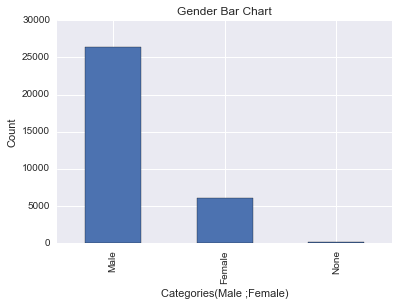

In [17]:
Gender_plot = d.Gender.value_counts().plot(kind = 'bar' )
Gender_plot.set_title("Gender Bar Chart")
Gender_plot.set_xlabel("Categories(Male ;Female)")
Gender_plot.set_ylabel("Count")

In [18]:
d.Age_Group.value_counts()

18-24          15802
25-34          11575
Under 18        2330
35-44           2257
45-54            502
55-64            140
None              88
65 or Above       60
Name: Age_Group, dtype: int64

In [19]:
d.Age_Group.describe()

count     32754
unique        8
top       18-24
freq      15802
Name: Age_Group, dtype: object

In [20]:
d[d.Age_Group.isnull()]


,Entry Id,Gender,Age_Group,Marital_Status,Employment_Status,Military_Service,Children_Under18_Home,Education_Level,Country,US_State_Live,Annual_Income,Subereddit_Data,Cat_or_Dog,FAV_CHEESE


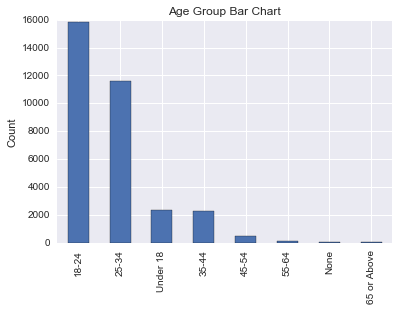

In [21]:
Age_Group = d.Age_Group.value_counts().plot(kind = 'bar' )
Age_Group.set_title("Age Group Bar Chart")
Age_Group.set_xlabel("")
Age_Group.set_ylabel("Count")

In [22]:
d.Marital_Status.value_counts()

Single                                      10428
In a relationship                            9828
Forever Alone                                5850
Married/civil union/domestic partnership     5490
Engaged                                      1109
Widowed                                        44
Blank                                           5
Name: Marital_Status, dtype: int64

In [23]:
d[d.Marital_Status=="Blank"]

,Entry Id,Gender,Age_Group,Marital_Status,Employment_Status,Military_Service,Children_Under18_Home,Education_Level,Country,US_State_Live,Annual_Income,Subereddit_Data,Cat_or_Dog,FAV_CHEESE
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none


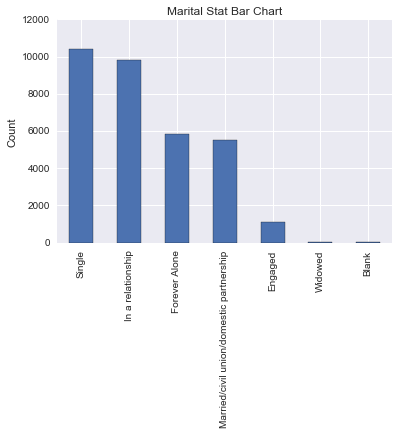

In [24]:
M_S = d.Marital_Status.value_counts().plot(kind = 'bar' )
M_S.set_title("Marital Stat Bar Chart")
M_S.set_xlabel("")
M_S.set_ylabel("Count")

In [25]:
d.Employment_Status.value_counts()

Employed full time                       14814
Student                                  12987
Not employed, but looking for work        2087
Freelance                                 1948
Not employed and not looking for work      682
None                                       151
Retired                                     85
Name: Employment_Status, dtype: int64

In [26]:
d.Employment_Status.describe()

count                  32754
unique                     7
top       Employed full time
freq                   14814
Name: Employment_Status, dtype: object

In [27]:
d[d.Employment_Status.isnull()]


,Entry Id,Gender,Age_Group,Marital_Status,Employment_Status,Military_Service,Children_Under18_Home,Education_Level,Country,US_State_Live,Annual_Income,Subereddit_Data,Cat_or_Dog,FAV_CHEESE


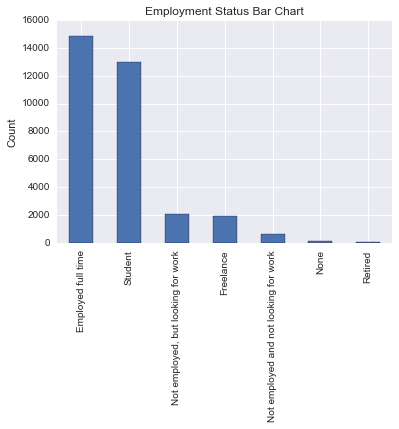

In [28]:
E_S = d.Employment_Status.value_counts().plot(kind = 'bar' )
E_S.set_title("Employment Status Bar Chart")
E_S.set_xlabel("")
E_S.set_ylabel("Count")

In [29]:
d.Military_Service.value_counts()

No      30526
Yes      2223
none        5
Name: Military_Service, dtype: int64

In [30]:
d.Military_Service.describe()

count     32754
unique        3
top          No
freq      30526
Name: Military_Service, dtype: object

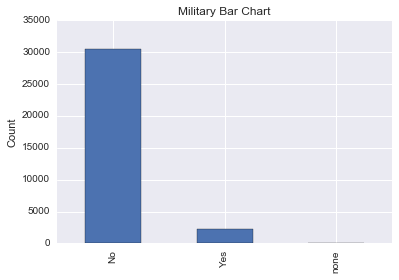

In [31]:
M_S = d.Military_Service.value_counts().plot(kind = 'bar' )
M_S.set_title("Military Bar Chart")
M_S.set_xlabel("")
M_S.set_ylabel("Count")

In [32]:
d[d.Military_Service=="None"]

,Entry Id,Gender,Age_Group,Marital_Status,Employment_Status,Military_Service,Children_Under18_Home,Education_Level,Country,US_State_Live,Annual_Income,Subereddit_Data,Cat_or_Dog,FAV_CHEESE


In [33]:
d. Children_Under18_Home.value_counts()

No      27488
Yes      5047
None      219
Name: Children_Under18_Home, dtype: int64

In [34]:
d[d.Children_Under18_Home.isnull()]


,Entry Id,Gender,Age_Group,Marital_Status,Employment_Status,Military_Service,Children_Under18_Home,Education_Level,Country,US_State_Live,Annual_Income,Subereddit_Data,Cat_or_Dog,FAV_CHEESE


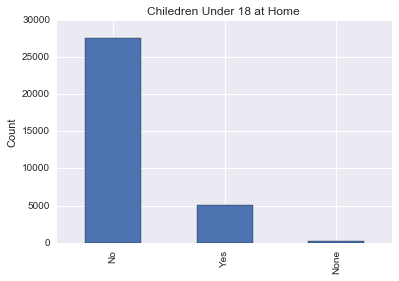

In [35]:
Children_Under18_Home = d.Children_Under18_Home.value_counts().plot(kind = 'bar' )
Children_Under18_Home.set_title("Chiledren Under 18 at Home ")
Children_Under18_Home.set_xlabel("")
Children_Under18_Home.set_ylabel("Count")


In [36]:
d[d.Children_Under18_Home=="None"]

,Entry Id,Gender,Age_Group,Marital_Status,Employment_Status,Military_Service,Children_Under18_Home,Education_Level,Country,US_State_Live,Annual_Income,Subereddit_Data,Cat_or_Dog,FAV_CHEESE
318,319,Male,35-44,In a relationship,Employed full time,Yes,None,Some college,United States,Minnesota,"$50,000 - $69,999",NaN,I like cats.,Goat
552,553,Male,18-24,Single,Student,No,None,Bachelor's degree,United States,Massachusetts,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American
675,676,None,None,Forever Alone,None,Yes,None,None,United States,Arizona,none,NaN,I like dogs.,Cheddar
1043,1044,Male,18-24,In a relationship,Student,No,None,Some college,Canada,NaN,"Under $20,000",rowing,I like cats.,Cheddar
1145,1146,Male,Under 18,In a relationship,Student,No,None,Some high school,United States,Arkansas,"$40,000 - $49,999",fffffffuuuuuuuuuuuu,I like dogs.,Provolone
1203,1204,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,None,Graduate or professional degree,Italy,NaN,"$20,000 - $29,999",truereddit,I like dogs.,Other
1385,1386,Male,18-24,Single,Student,No,None,High school graduate or equivalent,United States,New York,"$70,000 - $99,999",askreddit,I like dogs.,Other
1493,1494,Male,25-34,In a relationship,Employed full time,No,None,Bachelor's degree,france,NaN,"$40,000 - $49,999",iama,I like cats.,Other
1565,1566,None,None,Forever Alone,None,Yes,None,None,none,NaN,"$70,000 - $99,999","tf2, ireland",I like dogs.,Goat
1616,1617,Male,18-24,In a relationship,Employed full time,No,None,Graduate or professional degree,United States,California,"$30,000 - $39,999",NaN,I like turtles.,Brie


In [37]:
d. Education_Level.value_counts()

Bachelor's degree                     11046
Some college                           9600
Graduate or professional degree        4722
High school graduate or equivalent     3272
Some high school                       1924
Associate degree                       1411
Trade or Vocational degree              635
None                                    144
Name: Education_Level, dtype: int64

In [38]:
d. Education_Level.describe()

count                 32754
unique                    8
top       Bachelor's degree
freq                  11046
Name: Education_Level, dtype: object

In [39]:
d[d.Education_Level.isnull()]


,Entry Id,Gender,Age_Group,Marital_Status,Employment_Status,Military_Service,Children_Under18_Home,Education_Level,Country,US_State_Live,Annual_Income,Subereddit_Data,Cat_or_Dog,FAV_CHEESE


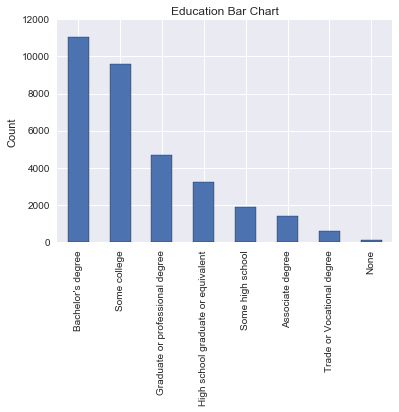

In [40]:
Education_Level = d.Education_Level.value_counts().plot(kind = 'bar' )
Education_Level.set_title("Education Bar Chart")
Education_Level.set_xlabel("")
Education_Level.set_ylabel("Count")


In [41]:
d.Country.describe()

count             32754
unique              440
top       United States
freq              20967
Name: Country, dtype: object

In [42]:
d.Country.value_counts()

United States                       20967
Canada                               2888
United Kingdom                       1782
Australia                            1051
Germany                               407
New Zealand                           315
Sweden                                309
Norway                                288
Ireland                               242
Finland                               188
Denmark                               182
none                                  177
India                                 154
France                                142
The Netherlands                       141
Netherlands                           134
Belgium                               119
Poland                                112
Brazil                                111
Mexico                                108
Spain                                 100
canada                                 97
Portugal                               87
Switzerland                       

In [43]:
d[d.Country.isnull()]


,Entry Id,Gender,Age_Group,Marital_Status,Employment_Status,Military_Service,Children_Under18_Home,Education_Level,Country,US_State_Live,Annual_Income,Subereddit_Data,Cat_or_Dog,FAV_CHEESE


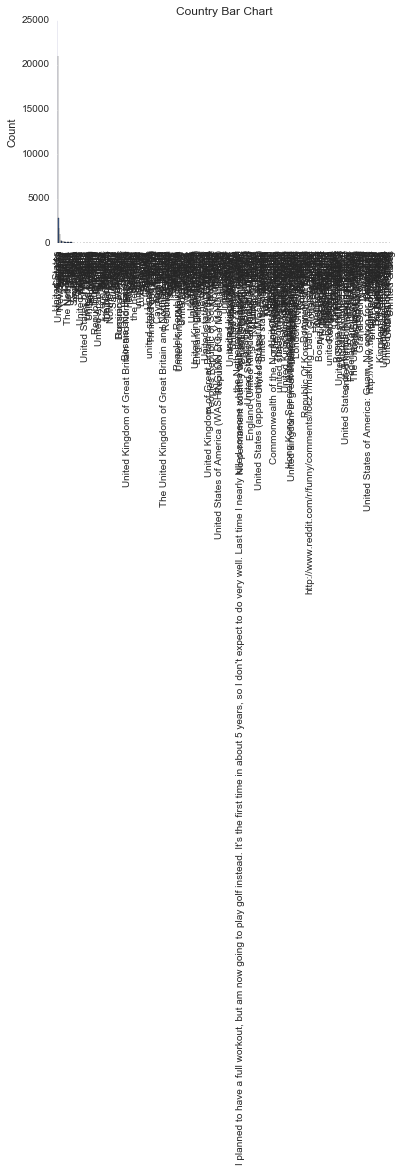

In [44]:
Country = d.Country.value_counts().plot(kind = 'bar' )
Country.set_title("Country Bar Chart")
Country.set_xlabel("")
Country.set_ylabel("Count")


In [45]:
d. Annual_Income.value_counts()

Under $20,000          7892
$50,000 - $69,999      4133
$70,000 - $99,999      4101
$100,000 - $149,999    3522
$20,000 - $29,999      3206
$30,000 - $39,999      2904
$150,000 or more       2695
$40,000 - $49,999      2686
none                   1615
Name: Annual_Income, dtype: int64

In [46]:
d. Annual_Income.describe()

count             32754
unique                9
top       Under $20,000
freq               7892
Name: Annual_Income, dtype: object

In [47]:
d[d.Annual_Income.isnull()]

,Entry Id,Gender,Age_Group,Marital_Status,Employment_Status,Military_Service,Children_Under18_Home,Education_Level,Country,US_State_Live,Annual_Income,Subereddit_Data,Cat_or_Dog,FAV_CHEESE


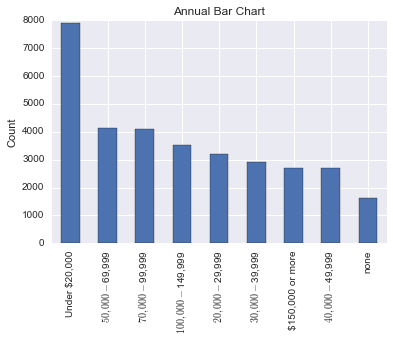

In [48]:
Annual_Income=d. Annual_Income.value_counts().plot(kind = 'bar' )
Annual_Income.set_title("Annual Bar Chart")
Annual_Income.set_xlabel("")
Annual_Income.set_ylabel("Count")


In [49]:
d.Subereddit_Data.value_counts()

askreddit                                        2123
fffffffuuuuuuuuuuuu                              1746
pics                                             1651
trees                                            1311
gaming                                           1207
funny                                            1092
atheism                                           839
askscience                                        779
all                                               647
todayilearned                                     645
starcraft                                         611
iama                                              576
minecraft                                         520
f7u12                                             515
programming                                       501
twoxchromosomes                                   396
science                                           378
truereddit                                        347
wtf                         

In [50]:
del d["Subereddit_Data"]

In [51]:
del d["Entry Id"]

In [52]:
d.columns

Index([u'Gender', u'Age_Group', u'Marital_Status', u'Employment_Status',
       u'Military_Service', u'Children_Under18_Home', u'Education_Level',
       u'Country', u'US_State_Live', u'Annual_Income', u'Cat_or_Dog',
       u'FAV_CHEESE'],
      dtype='object')

In [53]:
d.columns 

Index([u'Gender', u'Age_Group', u'Marital_Status', u'Employment_Status',
       u'Military_Service', u'Children_Under18_Home', u'Education_Level',
       u'Country', u'US_State_Live', u'Annual_Income', u'Cat_or_Dog',
       u'FAV_CHEESE'],
      dtype='object')

In [54]:
d.Cat_or_Dog.value_counts()

I like dogs.       17149
I like cats.       11152
I like turtles.     4442
none                   5
askreddit              2
 Reddit.com            1
movies                 1
Name: Cat_or_Dog, dtype: int64

In [55]:
d.Cat_or_Dog.describe()

count            32752
unique               7
top       I like dogs.
freq             17149
Name: Cat_or_Dog, dtype: object

In [56]:
d.loc[d['Cat_or_Dog'] == 'I like turtles.', 'Cat_or_Dog'] = 'none'
d.loc[d['Cat_or_Dog'] == 'askreddit.', 'Cat_or_Dog'] = 'none'
d.loc[d['Cat_or_Dog'] == 'askreddit', 'Cat_or_Dog'] = 'none'
d.loc[d['Cat_or_Dog'] == ' Reddit.com', 'Cat_or_Dog'] = 'none'
d.loc[d['Cat_or_Dog'] == 'movies', 'Cat_or_Dog'] = 'none'




In [57]:
d.Cat_or_Dog.value_counts()

I like dogs.    17149
I like cats.    11152
none             4451
Name: Cat_or_Dog, dtype: int64

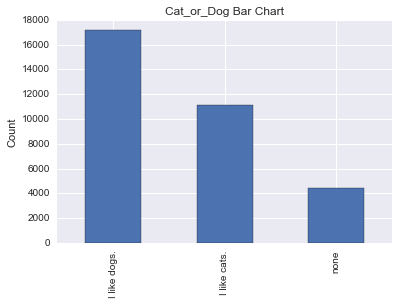

In [58]:
Cat_or_Dog =d.Cat_or_Dog.value_counts().plot(kind = 'bar' )
Cat_or_Dog.set_title("Cat_or_Dog Bar Chart")
Cat_or_Dog.set_xlabel("")
Cat_or_Dog.set_ylabel("Count")


In [59]:
d.columns


Index([u'Gender', u'Age_Group', u'Marital_Status', u'Employment_Status',
       u'Military_Service', u'Children_Under18_Home', u'Education_Level',
       u'Country', u'US_State_Live', u'Annual_Income', u'Cat_or_Dog',
       u'FAV_CHEESE'],
      dtype='object')

In [61]:
d.columns

Index([u'Gender', u'Age_Group', u'Marital_Status', u'Employment_Status',
       u'Military_Service', u'Children_Under18_Home', u'Education_Level',
       u'Country', u'US_State_Live', u'Annual_Income', u'Cat_or_Dog',
       u'FAV_CHEESE'],
      dtype='object')

In [62]:
d.FAV_CHEESE.value_counts()

Other            6562
Cheddar          6101
Brie             3742
Provolone        3454
Swiss            3214
Feta             2991
Goat             2516
Munster          1770
American         1438
Paneer            618
Limburger         337
none                5
 f7u12              2
1                   1
programming')       1
 awww               1
 Pics               1
Name: FAV_CHEESE, dtype: int64

In [63]:
d.FAV_CHEESE.describe()

count     32754
unique       17
top       Other
freq       6562
Name: FAV_CHEESE, dtype: object

In [82]:
d.loc[d['FAV_CHEESE'] == ' f7u12', 'FAV_CHEESE'] = 'none'
d.loc[d['FAV_CHEESE'] == '1', 'FAV_CHEESE'] = 'none'
d.loc[d['FAV_CHEESE'] == "programming')", 'FAV_CHEESE'] = 'none'
d.loc[d['FAV_CHEESE'] == ' awww', 'FAV_CHEESE'] = 'none'
d.loc[d['FAV_CHEESE'] == ' Pics', 'FAV_CHEESE'] = 'none'
d.loc[d['FAV_CHEESE'] == 'None', 'FAV_CHEESE'] = 'none'

In [84]:
d.FAV_CHEESE.value_counts()

Other        6562
Cheddar      6101
Brie         3742
Provolone    3454
Swiss        3214
Feta         2991
Goat         2516
Munster      1770
American     1438
Paneer        618
Limburger     337
none           11
Name: FAV_CHEESE, dtype: int64

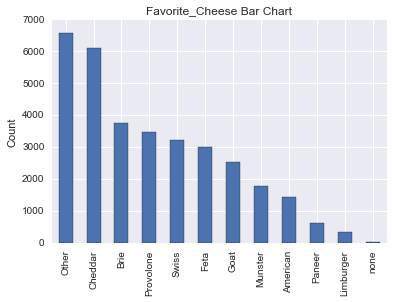

In [85]:
Fav_Cheese=d.FAV_CHEESE.value_counts().plot(kind = 'bar' )
Fav_Cheese.set_title("Favorite_Cheese Bar Chart")
Fav_Cheese.set_xlabel("")
Fav_Cheese.set_ylabel("Count")

Aggregating the country and the continent.

In [86]:
Asia=['Afghanistan' ,'Armenia','Azerbaijan','Bahrain','Bangladesh' ,'Bhutan' ,
      'Brunei', 'Cambodia','China', 'Cyprus' , 'Georgia', 'India', 'Indonesia' , 'Iran', 'Iraq', 'Israe' , 'Japan', 
      'Jordan' , 'Kazakhstan' , 'Kuwait', 'Kyrgyzstan' , 'Laos', 'Lebanon', 'Malaysia' , 'Maldives', 'Mongolia', 'Myanmar' ,
      'Nepal' ,'North Korea', 'Oman','Pakistan', 'Palestine' ,'Philippines', 'Qatar','Russia', 'Saudi Arabia', 'Singapore',
      'South Korea','Sri Lanka', 'Syria' , 'Taiwan', 'Tajikistan' , 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 
      'United Arab Emirates', 'Uzbekistan' , 'Vietnam' , 'Yemen','Israel','Kuwait','india','thailand', 'Korea, South'
      'JAPAN', 'INDIA','japan','malaysia','Hong Kong'
     ]
Africa=[
    'Algeria','Angola','Benin','Botswana','Burkina Faso','Burundi','Cabo Verde',
'Cameroon','Central African Republic','Chad',
'Comoros','Democratic Republic of the Congo','Republic of the Congo',
'Cote d Ivoire','Djibouti','Egypt','Equatorial Guinea','Eritrea','Ethiopia','Gabon','Gambia','Ghana','Guinea',
'Guinea-Bissau','Kenya','Lesotho','Liberia','Libya','Madagascar','Malawi','Mali','Mauritania','Mauritius','Morocco',
'Mozambique','Namibia','Niger','Nigeria', 'Rwanda','Sao Tome and Principe','Senegal','Seychelles','Sierra Leone',
'Somalia','South Africa','South Sudan','Sudan','Swaziland' ,'Tanzania','Togo','Tunisia','Uganda' ,'Zambia','Zimbabwe'
        ]
Antartica=['Antarctica']
Australia=['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau',
           'Papua New Guinea' ,'Samoa', 'Solomon Islands' ,'Tonga' ,'Tuvalu' ,'Vanuatu','australia']
Europe=['United kingom','United kingdom ','Croatua','switzerland','ITALY IT','england','England','SPAIN','Itaky',
        'Scotland and Sweden','NORWAY', 'DENMARK','Austria','austria'
       'United kingdom of great britain and northern Ireland','Unitd Kingdom',
        'british virgin islands','BG','Denmark ','Serbia','serbia','UNited Kingdom','Galiza','The Netherlands','Netherlands, the',
       'Belgrium', 'slovenia','united kingdom / scotland', 'United Kingdom of Great Britain','uk','Czech republic',
        'United Kingdo,','Great Britian ','the Netherlands (a.k.a. Holland)',
        'Slovak Republic','Norway.','Australia and United Kingdom','IRELAND','England (United Kingdom is not a country)',
        'Bosnia And Herzegovina','Catalonia','new Zealand ','Newzealand ', 'FUNLAND','Belgrium','slovenia',
        'Republic of Ireland','Republic of Ireland ','BELGIUM','Peoples Republic of South Yorkshire',
        'United Kingdon', 'wales','norway', 'Swedeb','Netehrlands','Kingdom of Norway',
         'Holland','Federal Republic of Germany','United Kingdom (England)', 'United KIngdom',
        'England','Scotland','FRANCE','romania','Northern Ireland','sweden','Sweden',
        'Federal Republic of Germany','The NEtherlands','denmark','FUNLAND','Belgrium','Nether',
        'Commonwealth of the Northern Mariana Islands','Helsinki','U.K lol', 'scotland',
        'UK','U.K.','estonia','London United Kingdom','Frande','poland', 'U.K. Problem?',
        'Lithuania/United Kingdom','Kosova','Kosovo','U.K','United ','Denmark','United Kingdom','Belgium','Italy','italy','Romania',
           'Germany', 'France', 'Greece', 'Switzerland','Netherlands', 'Bulgaria', 'Spain', 'Poland', 'Finland',
         'the Netherlands','Slovenia','Iceland','Bosnia and Herzegovina','Croatia','united kingdom',
          'New Zealand','Estonia','Puerto Rico','Portugal','Slovakia','Ukraine', 'Macedonia','Czech Republic',
        'Lithuania','United Kingdom (Scotland)','Swiss','Bermuda','Dominica','United Jingdom', 'Gibraltar', 'ireland',
         'Hungary','Uninted Kingdom','Isle of Man','Luxembourg','Swedem','Wales', 'Latvia', 'POLAND',
           'u.k', 'United  Kingdom', 'spain', 'germany','new zealand','Equestria',
           'United Kingdom of Great Britain and Northern Ireland','Republic of Poland', 'Honduras','ENGLAND', 'GErmany', 'greece',  
         'Ger','finland','iceland','belgium', 'Sweden ','Republic Of Ireland','England ','Great Britain','New zealand', 'New Zealand ',
        'The United Kingdom of Great Britain and Northern Ireland','Albania',
        'Grand Duchy of Baden','United Kingdown','Faroe Islands','Portugal',
       'Untied Kingdom ', 'The Czech Republic','Montenegro','Antigua and Barbuda','United Kindom',' United Kingdom',
        'The Republic of Ireland', 'Australia ','Andorra','czech republic','Untied Kingdom','St.Vincent', 'Ireland ',
        'united kingdom of great Britain ','UNITED KINGDOM','united kingdom ','Unted Kingdom','New Zealanad','United Knigdom', 
        'Finland ', 'netherlands','The Netherlands ','Bosnia and Herzegowina','united kingdom, Spain ',
        'ITALY','croatia','Belarus','United Kingdom, India','Portugal ',
          'Ireland','United Kingdom ','Malta','france','United kingdom,England, United Kingdom','United kingdom',
            'England, United Kingdom','Germany ','Republic of Moldova','the netherlands',
            'United Kingdom of Great Britain & Northern Ireland','Frabce','Swden','Moldova']
North_America=['United States','canada','Trinidad and TObago','Commonwealth of the Northern Mariana Islands',
               'Republic of the Marshall Islands','united states of America ','Amurika',
               'Belgium/Canada','america','haiti','United Strate','Canada, Eh','United s',
               'The Dominion of Canada','United States (Guam)','Ontario, Canada','united states (my state is APO) ',
               'Mx','Mexico','mexico','Canada, Bitches.','United States of America (Washington, DC)',
               'United States of America (WASHINGTON DC, Y U NO LISTED?)','US OF A','U.S','USA ','California',
               "United States (apparently I can't put D.C. as my state)",'united states', 'united states :f',
               'United States, District of Columbia','U S A','USVI','america','united Sr','Idaho'
               ,'Canada (currently Korea)','Canada','CANADA','Norway',
               'United states of America. ','Costa Rica','M\xc3\xa9xico','Barbados','Canada, eh?',
                'United states of America', 'United States of ', 
                'United States of America (DC)','Trinidad & Tobago',
                'Belize','Dominion of Canada', 'Toronto','El Salvador','Canadia','Trinidad and Tobago',
                'Cayman Islands','Amerikka', 'Guatemala','United States ', 'US','united stateds','Amerikka', 'Guatemala','MEXICO  ',
               'United States of America: Guam. No option for territories :(','United states',
                'Sint Maarten','united sates','The United States of America','Usa', 'United st','Mexico ',
                'united States','Unnited States','Bahamas',' Canada','canada ', 'United States of America ', 
                'United States Of America', 'Guam', 'usa','greenland','Camada','U.S.A.','Canda','Unites States','Panama',
              'United Sates','Canada ','united states of america','United States of America', 'Cananda',
              'United States of American','United States (Washington, DC)','united states of American', 
               'Nicaragua','MEXICO','USA',' Canada eh'] 
South_America=['Chile','Argentina','Bolivia','Brazil','Colombia','Ecuador',
               'French Guiana','Guyana','Paraguay','brazil','Brasil','chile','Uruguay ','venezuela','Peru','Suriname','argentina','colombia','Venezuela',
               'ecuador','Brazilf','Uruguay']

In [92]:
Continents = []
NOT_present=[]
for i in d['Country']:
    cont=''
    try:
        cont=transformations.cn_to_ctn(i)
        Continents.append[cont]
    except:
        if(i in Asia):
            cont="Asia"
            Continents.append(cont)
        elif(i in Africa):
            cont="Africa"
            Continents.append(cont)
        elif(i in Australia):
            cont="Australia"
            Continents.append(cont)
        elif(i in Antartica): 
            cont="Antartica"
            Continents.append(cont)
        elif(i in Europe):
            cont="Europe"
            Continents.append(cont)
        elif(i in North_America):
            cont="North America"
            Continents.append(cont)
        elif(i in South_America):
            cont="South America"
            Continents.append(cont)
        else:
            cont="None" 
            Continents.append(cont) 
            NOT_present.append(i)

In [93]:
Continents

['North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'Europe',
 'North America',
 'North America',
 'Europe',
 'North America',
 'North America',
 'North America',
 'Europe',
 'North America',
 'North America',
 'North America',
 'Europe',
 'Europe',
 'North America',
 'Europe',
 'Europe',
 'Europe',
 'North America',
 'Europe',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'Europe',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'North America',
 'Europe',
 'Europe',
 'Europe',
 'North America',
 'North America',
 'North America',
 'North America',
 'Europe',
 'Europe',
 'North America',
 'North America',
 'Europe',
 'North America',
 'Europe',
 'N

In [1]:
d['Continents']=Continents

NameError: name 'Continents' is not defined

In [2]:
del d['US_State_Live']

NameError: name 'd' is not defined

In [96]:
d.Continents.value_counts()

North America    24597
Europe            5247
Australia         1392
Asia               841
South America      281
None               279
Africa             115
Antartica            2
Name: Continents, dtype: int64

In [97]:
d.Continents.describe()

count             32754
unique                8
top       North America
freq              24597
Name: Continents, dtype: object

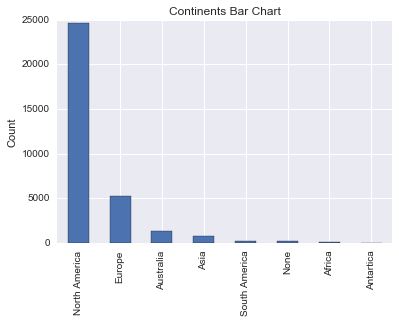

In [98]:
C=d.Continents.value_counts().plot(kind = 'bar' )
C.set_title("Continents Bar Chart")
C.set_xlabel("")
C.set_ylabel("Count")

In [99]:
import seaborn as sn

In [100]:
from string import letters

In [104]:
Num_Var = list(d.dtypes[d.dtypes != "object"].index)

In [105]:
d[Num_Var].head()


""
0
1
2
3
4


As per the assignment and my surname which starts from K my dependent variable is Marital status.

In [106]:
d.Marital_Status.value_counts()

Single                                      10428
In a relationship                            9828
Forever Alone                                5850
Married/civil union/domestic partnership     5490
Engaged                                      1109
Widowed                                        44
Blank                                           5
Name: Marital_Status, dtype: int64

In [108]:
y = d['Marital_Status']



In [109]:
y = y.replace(to_replace=['Single', 'In a relationship' , 'Forever Alone', 'Married/civil union/domestic partnership','Engaged','Widowed' ], value=[0,1,2,3,4,5])

In [110]:
y = y.replace(to_replace=[0, 1, 2, 3,4,5 ], value=[5,6,7,8,9,0])

In [111]:
y.head()

0    Blank
1    Blank
2    Blank
3    Blank
4    Blank
Name: Marital_Status, dtype: object

In [112]:
del d["Fav_Cheese"]


KeyError: 'Fav_Cheese'

In [113]:
del d["Country"]


In [114]:
d.columns

Index([u'Gender', u'Age_Group', u'Marital_Status', u'Employment_Status',
       u'Military_Service', u'Children_Under18_Home', u'Education_Level',
       u'Annual_Income', u'Cat_or_Dog', u'FAV_CHEESE', u'Continents'],
      dtype='object')

In [115]:
del d["Cat_or_Dog"]


Part 2: 
    Variables are most highly collinear and  graph the results:

In [116]:
def categorical_desc(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))
    
categorical_desc(d)

,Gender,Age_Group,Marital_Status,Employment_Status,Military_Service,Children_Under18_Home,Education_Level,Annual_Income,FAV_CHEESE,Continents
count,32754,32754,32754,32754,32754,32754,32754,32754,32754,32754
unique,3,8,7,7,3,3,8,9,12,8
top,Male,18-24,Single,Employed full time,No,No,Bachelor's degree,"Under $20,000",Other,North America
freq,26418,15802,10428,14814,30526,27488,11046,7892,6562,24597


In [123]:


categorical_var = ['Gender','Age_Group','Employment_Status','Military_Service',
       'Children_Under18_Home', 'Education_Level', 'Annual_Income','Continents']



In [125]:
for variable in categorical_var:
    # Create array of dummies
    dummies = pd.get_dummies(d[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    d = pd.concat([d, dummies], axis=1)
    d.drop([variable], axis=1, inplace=True)

In [126]:
d.isnull().sum()

Marital_Status                                             0
FAV_CHEESE                                                 0
Gender_Female                                              0
Gender_Male                                                0
Gender_None                                                0
Age_Group_18-24                                            0
Age_Group_25-34                                            0
Age_Group_35-44                                            0
Age_Group_45-54                                            0
Age_Group_55-64                                            0
Age_Group_65 or Above                                      0
Age_Group_None                                             0
Age_Group_Under 18                                         0
Employment_Status_Employed full time                       0
Employment_Status_Freelance                                0
Employment_Status_None                                     0
Employment_Status_Not em

In [127]:
correlation = d.corr()

In [128]:
correlation

,Gender_Female,Gender_Male,Gender_None,Age_Group_18-24,Age_Group_25-34,Age_Group_35-44,Age_Group_45-54,Age_Group_55-64,Age_Group_65 or Above,Age_Group_None,...,"Annual_Income_Under $20,000",Annual_Income_none,Continents_Africa,Continents_Antartica,Continents_Asia,Continents_Australia,Continents_Europe,Continents_None,Continents_North America,Continents_South America
Gender_Female,1.000000,-0.980288,-0.037724,0.047638,-0.032750,-0.027108,0.009537,0.010528,0.017864,-0.008289,...,0.051927,-0.013191,-0.007329,-0.003752,-0.024502,-0.020067,-0.094254,-0.016398,0.107456,-0.021749
Gender_Male,-0.980288,1.000000,-0.160452,-0.040098,0.031868,0.027036,-0.008741,-0.009381,-0.020595,-0.067160,...,-0.049405,0.004787,0.008162,0.003827,0.024769,0.019645,0.093563,-0.009277,-0.101503,0.022090
Gender_None,-0.037724,-0.160452,1.000000,-0.035184,0.002427,-0.001313,-0.003439,-0.005148,0.014919,0.381091,...,-0.009535,0.041691,-0.004664,-0.000614,-0.002869,0.000887,-0.002344,0.128844,-0.023453,-0.003071
Age_Group_18-24,0.047638,-0.040098,-0.035184,1.000000,-0.713762,-0.262653,-0.120453,-0.063257,-0.041361,-0.050112,...,0.261527,0.019148,-0.009794,-0.007545,-0.035051,0.001950,-0.004729,-0.018351,0.023637,-0.010976
Age_Group_25-34,-0.032750,0.031868,0.002427,-0.713762,1.000000,-0.201115,-0.092232,-0.048436,-0.031670,-0.038371,...,-0.189364,-0.086353,0.012266,0.010570,0.040298,-0.002191,0.003962,0.004450,-0.023686,0.017796
Age_Group_35-44,-0.027108,0.027036,-0.001313,-0.262653,-0.201115,1.000000,-0.033940,-0.017824,-0.011654,-0.014120,...,-0.117478,-0.014634,-0.001884,-0.002126,0.003847,0.006621,0.016576,0.001016,-0.017258,-0.005702
Age_Group_45-54,0.009537,-0.008741,-0.003439,-0.120453,-0.092232,-0.033940,1.000000,-0.008174,-0.005345,-0.006475,...,-0.055763,0.002580,-0.003204,-0.000975,-0.010825,-0.002876,-0.023320,-0.008859,0.028744,-0.006216
Age_Group_55-64,0.010528,-0.009381,-0.005148,-0.063257,-0.048436,-0.017824,-0.008174,1.000000,-0.002807,-0.003401,...,-0.023782,-0.001952,0.004023,-0.000512,-0.004718,-0.004523,-0.017132,-0.000980,0.019333,-0.006095
Age_Group_65 or Above,0.017864,-0.020595,0.014919,-0.041361,-0.031670,-0.011654,-0.005345,-0.002807,1.000000,-0.002223,...,-0.007441,-0.006458,0.033670,-0.000335,-0.006954,-0.001946,-0.005084,0.003799,0.003207,-0.003985
Age_Group_None,-0.008289,-0.067160,0.381091,-0.050112,-0.038371,-0.014120,-0.006475,-0.003401,-0.002223,1.000000,...,-0.014072,0.091699,-0.003081,-0.000406,-0.008426,0.003684,-0.003372,0.200565,-0.036940,-0.004828


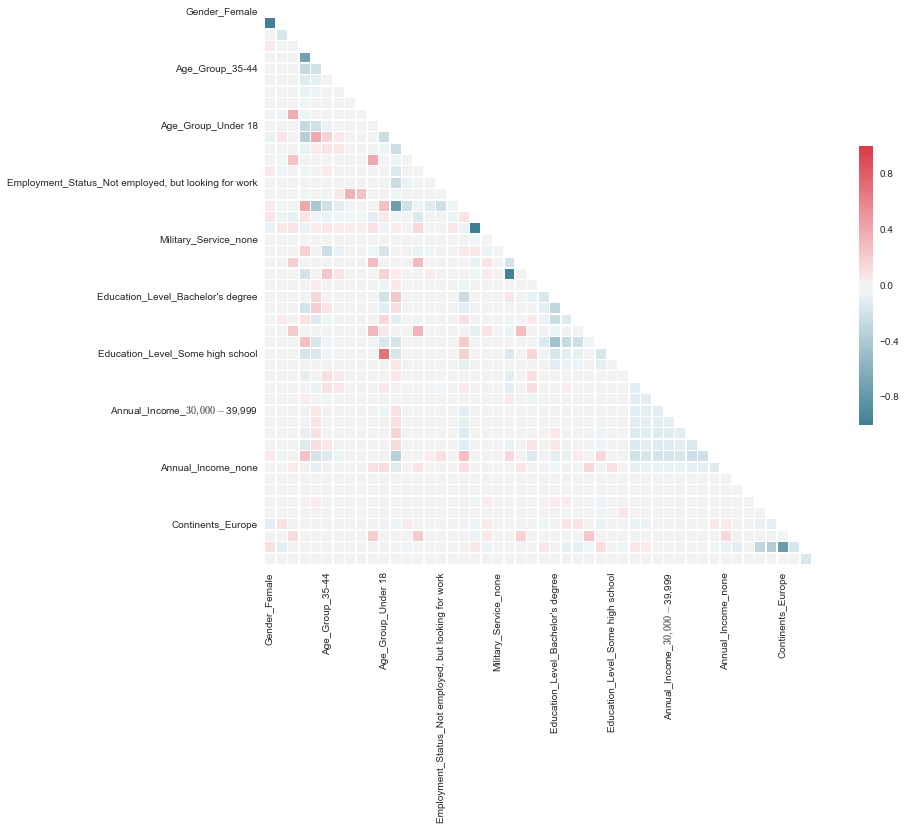

In [142]:
#lets plot the variables to understand which variables are highly collinear
from string import letters
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="white")

# calculate the corelation matrix 
correlation = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.3,square=True, 
            xticklabels=5, yticklabels=5,linewidths=.5, 
            cbar_kws={"shrink": .5}, ax=ax)